###### Content under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c)2014 L.A. Barba, G.F. Forsyth.

# Coding Assignment: Rocket

The equations of motion for a rocket in purely vertical flight are given by

\begin{align}
\frac{dh}{dt} &= v\\
(m_s+m_p) \frac{dv}{dt}& = -(m_s+m_p)g + \dot{m}_pv_e - \frac{1}{2}\rho v|v|AC_D
\end{align}

$h$ is the altitude of the rocket

$m_s = 50kg$ is the weight of the rocket shell

$g = 9.81 \frac{m}{s^2}$

$\rho = 1.091 \frac{kg}{m^3}$ is the average air density (assumed constant throughout flight)

$A = \pi r^2$ is the maximum cross sectional area of the rocket, where $r = 0.5 m$

$v_e = 325 \frac{m}{s}$ is the exhaust speed

$C_D = 0.15 $ is the drag coefficient

$m_{po} = 100 kg$ at time $t = 0$ is the initial weight of the rocket propellant

The mass of the remaining propellant is given by:

$$m_p = m_{po} - \int^t_0 \dot{m}_p d\tau$$

where $\dot{m}_p$ is the time-varying burn rate given by the following figure:

Propellant Burn Rate

![burn rate](./burn.rate.png)

Using Euler's method with a timestep of $\Delta t=0.1s$, create a Python script to calculate the altitude and velocity of the rocket from launch until crash down.  






## Assessment:

To check your answers, you can register for [MAE 6286: Practical Numerical Methods with Python](http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/about).

1. At time $t=3.2s$, what is the mass (in kg) of rocket propellant remaining in the rocket?

2. What is the maximum speed of the rocket in $\frac{m}{s}$?
    At what time does this occur (in seconds)? 
    What is the altitude at this time (in meters)? 
    
3. What is the rocket's maximum altitude during flight (in meters)? At what time (in seconds) does this occur?

4. At what time (in seconds) does the rocket impact the ground? What is the velocity of the rocket (in $\frac{m}{s}$) at time of impact?

### Résolution du challenge "Rocket".

Le but ici est d'étudier et de fournir divers données sur la trajectoire de vol d'une fusée, i.e sa vitesse à un instant donné, etc. 

Pour se faire nous allons, dans un premier temps, étudier les équations de mouvement (1) et (2) de la fusée ainsi que l'équation de variation de la masse de propergol fournies ci-dessus. Ensuite, nous allons utiliser la méthode d'Euler pour calculer et obtenir les divers renseignements recherchés.


##### 1. Etude des équations du mouvement de la fusée.

Commençons par rappeler les équations du mouvement de la fusée. Ces équations sont données par :

\begin{align}
\frac{dh}{dt} &= v\\
(m_s+m_p) \frac{dv}{dt}& = -(m_s+m_p)g + \dot{m}_pv_e - \frac{1}{2}\rho v|v|AC_D
\end{align}

Ces deux équations sont 2 EDO du premier ordre. Appliquons le raisonnement vu tout au long de ce $1^{er}$ module afin de pouvoir appliquer la méthode d'Euler. Pour se faire, commençons par écrire plus succinctement les dérivées par rapport au temps par des primes et faisons passer le terme $(m_s+m_p)$ du côté droit de l'égalité de l'équation (4), nous obtenons :

\begin{align}
h' &= v\\
v' &= -g + \frac{v_e}{m_s+m_p}\dot{m}_p - \frac{\rho v|v|AC_D}{2 (m_s+m_p)}
\end{align}


Avant de poursuivre, notons que nous pouvons représenter ceci sous forme vectorielle comme nous l'avons vu au cours de ce module. Notre système se représente donc comme suit :
$$u'(t) = f(u)$$

où

\begin{align}
u & = \begin{pmatrix} h  \\ v \\\end{pmatrix} & f(u) & = \begin{pmatrix} v \\ \frac{v_e}{m_s+m_p}\dot{m}_p - \frac{\rho v|v|AC_D}{2 (m_s+m_p)} - g  \end{pmatrix}.
\end{align}

Cette forme vectorielle présente l'avantage de représenter clairement ce qui devra être coder et comment ceci devra être fait. En effet, ces vecteurs correspondront tout simplement aux colonnes d'un tableau. En outre, f(u) sera une fonction définie et appelée au cours de la méthode d'Euler.  



Poursuivons la réécriture de notre système en remplaçant chacune des dérivée temporelle par une forme approximée. Nous aurons ainsi, par exemple, pour h' :

\begin{align}
h'(t) \approx \frac{h^{n+1}-h^n}{\Delta t}
\end{align}
où n représente la $n^{e}$ valeur dans l'itération temporelle. Nos deux équations deviennent ainsi :

\begin{align}
\frac{h^{n+1}-h^n}{\Delta t} &= v\\
\frac{v^{n+1}-v^n}{\Delta t} &= \frac{v_e}{m_s+m_p}\dot{m}_p - \frac{\rho v|v|AC_D}{2 (m_s+m_p)} - g
\end{align}


Enfin, dans le but d'évaluer l'état à $t^{n+1}$ (donc pour h par exemple, on veut évaluer l'état $h^{n+1}$), on va évaluer toutes les données de notre système et ce à chaque itération $t^{n}$. Pour cela, il suffit d'isoler l'état n+1 dans chacune de nos équations ce qui nous donne :


\begin{align}
h^{n+1} &= {h^n} + \Delta{t} v\\
v^{n+1} &= {v^n} + \Delta{t} (\frac{v_e}{m_s+m_p}\dot{m}_p - \frac{\rho v|v|AC_D}{2 (m_s+m_p)} - g)
\end{align}

Ce qui nous donne finalement un système de deux EDO discrétisées sur lequel on va pouvoir appliqué la méthode d'Euler.

##### 2. Variation de la quantité de propergol au cours du vol.


D'autre part, la masse de $propergol^1$ évolue tout au long de la trajectoire selon:
\begin{align}
m_p = m_{po} - \int^t_0 \dot{m}_p d\tau
\end{align}


Nous pouvons modifier quelque peu cette dernière équation afin de pouvoir l'utiliser dans notre résolution numérique du problème. En approximant $l'intégrale^{2}$ par une somme pour N très grand, nous avons :

$$\int^t_0 \dot{m}_p d\tau \approx \sum_{n=0}^N (m_p (t_n) - m_p (t_{n-1}))$$

Ainsi, l'équation (3) devient par l'approximation :

\begin{align}
→ m_p = m_{po} - \sum_{n=0}^N (m_p (t_n) - m_p (t_{n-1}))
\end{align}

Il ne reste à présent qu'a déterminer la variation de la masse de propergol, $\dot{m}_p$, tout au long du vol. A partir du  graphique on à immédiatement que :

$$
\dot{m}_p = \left\{ 
\begin{aligned} 
\mbox{20  kg $s^{-1}$ si t} \in \mbox{ [ } 0,5 ] s\\
\mbox{0 kg $s^{-1}$ si t} \in \mbox{]} 5,+ \infty]s
\end{aligned}
\right.
$$

###### [1] Le propergol est un mélange de comburants (des oxydants) et de combustible (des réducteurs) présents séparément avant la combustion. Le propergol, parfois assimilé aux ergols (il s'agit également d'un mélange comburants-combustible), est utilisé comme carburant dans les systèmes propulsifs à réaction comme les fusées.

###### [2] Cette méthode d'approximation a été vue au cours " Calcul Différentiel et Intégrale " présenté par monsieur Joel Fine et Denis Bonheur, dans le cadre d'une première approche de la démonstration du "théorème fondamental de l'analyse".

##### 3. Résolution du problème.

\begin{equation}
\left\{
\begin{aligned}
m_p &= m_{po} - \sum_{n=0}^N (m_p (t_n) - m_p (t_{n-1}))\\
h^{n+1} &= {h^n} + \Delta{t} v\\
v^{n+1} &= {v^n} + \Delta{t} (\frac{v_e}{m_s+m_p}\dot{m}_p -                   \frac{\rho v|v|AC_D}{2 (m_s+m_p)} - g)\\
\end{aligned}
\right.
\end{equation}

In [2]:
import numpy
from matplotlib import pyplot
%matplotlib inline

Posons à présent les paramètres du problème fournis et entammons la résolution de notre problème.


In [3]:
def f(u):
    """Returns the right-hand side of the phugoid system of equations.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    
    h = u[0]
    v = u[1]
    return numpy.array([v,
                v_e/(m_s+m_p)*m_p_dot - rho*v*abs(v)*A*C_D/2*(m_s+m_p)-g])

In [4]:
def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

In [5]:
# Paramètres du modèle:

m_s = 50.0   # poids de la carcasse de la fusée en kg
g  = 9.81    # gravité en m s^{-2}
rho = 1.091  # densité moyenne de l'air en kg m^3
r  = 0.5     # rayon de la section transversale maximale de la fusée
A  = numpy.pi*r**2 # supericie de section transversale maximale de la fusée
v_e = 325.0  # vitesse d'échappement en m s
C_D = 0.15   # coefficient de traînée
m_po = 100   # poids initiale (t = 0) de propergol de la fusée

# Conditions initiales:

v0 = 0       # vitesse initiale de la fusée
h0 = 0       # altitude initiale de la fusée

In [6]:
# Discrétisation du temps

T = 100.0
dt = 0.1
N = int(T/dt)+1
t = numpy.linspace(0.0, T, N)

# Initialise le tableau contenant la solution pour chaque intervalle de temps
u = numpy.empty((N, 2))
u[0] = numpy.array([h0,v0])  # remplit le 1er élément avec les CI


# time loop - Euler method
for n in range(N-1): 
    if t[n] <= 5 :
        m_p_dot = 20
        m_p_inst= 20*t[n]
        m_p = m_po - m_p_inst
        u[n+1] = euler_step(u[n], f, dt)
    
    else :
        m_p_dot = 0
        m_p_inst= 0
        m_p = m_po - m_p_inst
        u[n+1] = euler_step(u[n], f, dt)

#En prenant u[n+1], on s'assure ainsi de conserver les valeurs ini pour n=0.
#On commence ainsi à u[1] (pour n=0) et on termine à u[N] (n=N-1).
#En prenant donc comme dernier step N-1 on termine bien avec N step


/serveur/logiciels/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:18: RuntimeWarning: overflow encountered in double_scalars
/serveur/logiciels/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in add


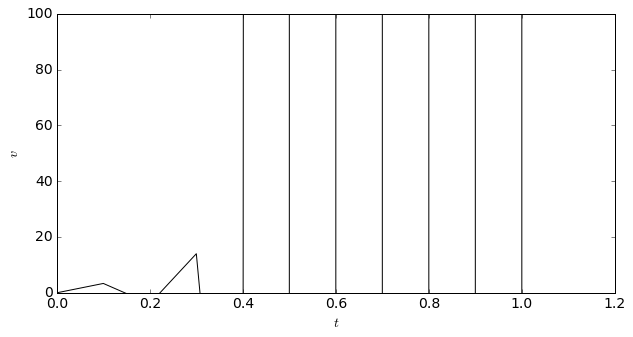

In [17]:
pyplot.figure(figsize=(10,5))   # initialise la taille du plot ("l'échelle d'affichage")
pyplot.ylim(0.0,100)             # limites du plot de l'axe y
pyplot.tick_params(axis='both', labelsize=14) # règle la taille de la police pour les graduations
pyplot.xlabel('$t$', fontsize=14) # nom de l'axe x & taille de la police
pyplot.ylabel('$v$', fontsize=14) # nom de l'axe y & taille de la police
pyplot.plot(t, u[:,1], 'k-');

##### Sources.

[1] https://fr.wikipedia.org/wiki/Propergol

## Derivation of the rocket equations

In case you are kind of confused about the rocket equations, here we show how to get to them. 

Newton's second law states that the acceleration of the vehicle times its mass is equal to all the forces acting on it. Therefore,

\begin{equation}
(m_s + m_p)\frac{d\bf{v}}{dt}=\sum {\bf F}.
\end{equation}
In the above formula we have assumed that the propellant inside the rocket and the rocket move at the same velocity (in other words, their relative velocity is negligible). 

Two of the external forces acting on the rocket are,

\begin{align}
{\bf F}_g&= (m_s+m_p)\bf{g} \quad (\rm{Gravity}),\\
{\bf F}_d&= - \frac{1}{2} \rho_a \mathbf{v} |\mathbf{v}| A  C_D \quad (\rm{Drag}).
\end{align}

We also need to consider the force resulting from the ejection of the propellant. During an interval $dt$, the engine of the rocket ejects downwards a mass of propellant given by $\dot m_p dt$. Relative to the rocket, the speed of the ejected burning gas is assumed constant and equal to $v_e$ (the exhaust speed). The momentum variation induced on the exhaust gas by the engine during that interval is therefore, $d{\bf p}_{gas} = \dot m_p {\bf v}_e dt$. Again using Newton's second law we conclude that the force applied by the rocket on the gas is,

\begin{align}
{\bf F}_{rocket\rightarrow gas} = \frac{d{\bf p}_{gas}}{dt} = \dot m_p {\bf v}_e
\end{align}

Using Newton's third law (|action| = |reaction|), the force exerted by the exhaust gas on the rocket is then,

\begin{align}
{\bf F}_{gas\rightarrow rocket} = -{\bf F}_{rocket\rightarrow gas} = -\dot m_p {\bf v}_e
\end{align}

If we collect all the forces acting on the rocket we finally have:

\begin{align}
(m_s + m_p)\frac{d\bf{v}}{dt}=(m_s+m_p){\bf g}- \frac{1}{2} \rho_a \mathbf{v} |v| A  C_D -\dot m_p {\bf v}_e
\end{align}



---

###### The cell below loads the style of the notebook.

In [ ]:
from IPython.core.display import HTML
css_file = '../../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())